In [2]:
"""This notebook generates figrue 3d,e,f for the MIST manuscript"""
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sys
sys.path.append("MIST/")
import utils
import numpy as np
from scipy.stats import spearmanr, pearsonr
from glob import glob
import math
from sklearn.preprocessing import RobustScaler,StandardScaler

# Function to plot the best performed gene in holdout experiments

In [3]:
gene = "GAPDH ENSG00000111640"
raw, df = utils.read_ST_data("data/Melanoma/raw.csv")
ori, _ = utils.data_norm(raw)
ori = np.log2(ori + 1)

# ho,_ = utils.read_ST_data("/Users/linhuaw/Documents/spImpute/paper_data/holdout_test/Melanoma2/ho_data_1.csv")
# mist, _ = utils.read_ST_data("/Users/linhuaw/Documents/spImpute/paper_data/holdout_test/Melanoma2/spImpute_1.csv") # read imputed data
ho,_ = utils.read_ST_data("data/Melanoma/ho_data_1.csv")
mist, _ = utils.read_ST_data("/Users/linhuaw/Documents/spImpute/paper_data/holdout_test/Melanoma2/spImpute_1.csv") # read imputed data

ho = ho.loc[ori.index,:]
ho = np.log2(ho + 1)

mist = mist.loc[ori.index,:]
mist = np.log2(mist + 1)

In [6]:
def plot_gene(data, meta, gene, n_outlier=0):
    """Function to plot non-zero gene expression with outliers"""
    
    meta = meta.loc[data.index,:]
    f = plt.figure(figsize=(4,4))
    zero_inds = data.index[data[gene] == 0].to_numpy()
    nonzero_inds = data.index[data[gene] > 0].to_numpy()
    
    # remove outlier
    nonzero_expr = data.loc[nonzero_inds, gene].to_numpy()
    for i in range(n_outlier + 1):
        nonzero_expr = np.delete(nonzero_expr, np.argmin(nonzero_expr))
        nonzero_inds = np.delete(nonzero_inds, np.argmin(nonzero_expr))
    
    nonzero_expr = nonzero_expr.reshape(-1, 1)
    # z-score normalize
    transformer = StandardScaler().fit(nonzero_expr) 
    nonzero_expr = transformer.transform(nonzero_expr)[:,0]
    zero_meta = meta.loc[zero_inds,:]
    nonzero_meta = meta.loc[nonzero_inds,:]
    
    sizes = []
    
    vmin, vmax = np.min(nonzero_expr), np.max(nonzero_expr)
    # normalize size of expression values
    for v in nonzero_expr:
        s = 10 + 35 * (v-vmin)/(vmax-vmin)
        sizes.append(s)
    
 
    p = plt.scatter(x=nonzero_meta.coordY.to_numpy(), 
                   y=nonzero_meta.coordX.to_numpy(),
                   c=nonzero_expr,s=sizes,
                   linewidth=0,  cmap='coolwarm')
    cbar = plt.colorbar()
        
    plt.scatter(x=zero_meta.coordY.to_numpy(),
               y=zero_meta.coordX.to_numpy(),
               s=8,c='black')
     
    plt.xticks([])
    plt.yticks([])
    return f

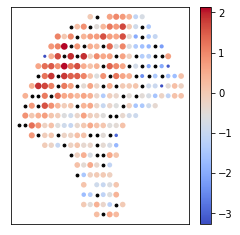

In [61]:
f1 = plot_gene(ho, df, gene)
f1.savefig("Fig3d_ho.png", dpi=200)

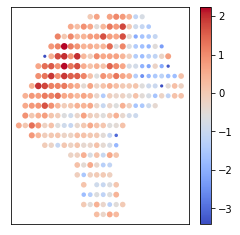

In [62]:
f2 = plot_gene(mist, df, gene)
f2.savefig("Fig3e_mist.png", dpi=200)

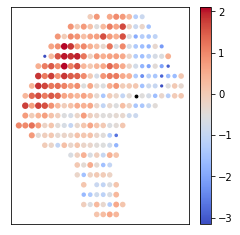

In [46]:
f3 = plot_gene(ori, df, gene)
f3.savefig("Fig3f_observed.png")

SpearmanrResult(correlation=0.834073641145529, pvalue=2.3588229898080096e-16)

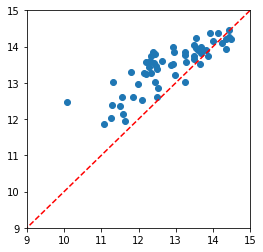

In [7]:
idx = np.where(ho[gene] == 0)[0]
plt.figure(figsize=(4,4))
plt.scatter(ori[gene].to_numpy()[idx], mist[gene].to_numpy()[idx])
plt.xlim(9, 15)
plt.ylim(9, 15)
plt.plot(np.arange(8,16, 1), np.arange(8,16, 1), color='red', ls='--')
from scipy.stats import pearsonr, spearmanr
#print(pearsonr(ori[gene].to_numpy()[idx], mist[gene].to_numpy()[idx]))
spearmanr(ori[gene].to_numpy()[idx], mist[gene].to_numpy()[idx])

SpearmanrResult(correlation=0.9533660032030864, pvalue=1.9745298485428834e-153)

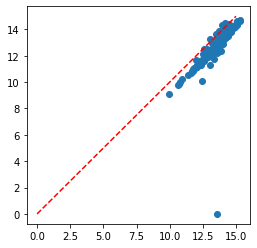

In [15]:
# Figure 3h
plt.figure(figsize=(4,4))
plt.scatter(mist[gene].to_numpy(), ori[gene].to_numpy())
# plt.xlim(9, 15)
# plt.ylim(9, 15)
plt.plot(np.arange(0,16, 1), np.arange(0,16, 1), color='red', ls='--')
spearmanr(mist[gene].to_numpy(), ori[gene].to_numpy())

SpearmanrResult(correlation=0.5993453644328368, pvalue=5.834400779014639e-30)

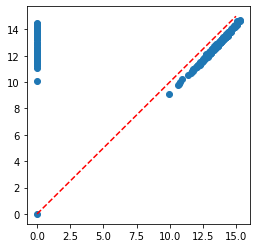

In [13]:
# Figure 3g
plt.figure(figsize=(4,4))
plt.scatter(ho[gene].to_numpy(), ori[gene].to_numpy())
plt.plot(np.arange(0,16, 1), np.arange(0,16, 1), color='red', ls='--')
spearmanr(ho[gene].to_numpy(), ori[gene].to_numpy())